In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import numpy as np
import seaborn as sns

%matplotlib inline    

In [2]:
may_stationary = pd.read_pickle('../data/may_stationaryscooter_tw.pkl')
june_stationary = pd.read_pickle('../data/june_stationaryscooter_tw.pkl')
july_stationary = pd.read_pickle('../data/july_stationaryscooter_tw.pkl')

In [3]:
company_dict = {0:'Bird', 1:'Lyft', 2:'Gotcha', 3:'Lime', 4:'Spin', 5:'Jump', 6:'Bolt'}
#to make graphing a little easier, maybe?  definitely easier to read ... 

In [4]:
#to group the charge percentages together for easier sorting
def percentage(row): 
    if 0 <= row ['chargelevel'] <= 10:
        return 10
    elif 10 < row ['chargelevel'] <=20:
        return 20
    elif 20 < row ['chargelevel'] <=30:
        return 30
    elif 30 < row['chargelevel'] <=40:
        return 40
    elif 40 < row['chargelevel'] <=50:
        return 50
    elif 50 < row['chargelevel'] <=60:
        return 60
    elif 60 < row['chargelevel'] <=70:
        return 70
    elif 70 < row['chargelevel'] <=80:
        return 80
    elif 80 < row['chargelevel'] <=90:
        return 90
    elif 90 < row['chargelevel'] <=100:
        return 100
    else:
        return 0

In [5]:
may_stationary.head(10)

,index,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours,latmovement,lonmovement,timeshift,duration,cumulative_sum
0,13040512,2019-05-24 07:20:00,36.216279,-86.729816,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,68.41,6,2019-05-24,07:20:00,7,0.0,0.0,NaN,0,0
1,16993465,2019-05-28 17:58:51,36.162549,-86.774197,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,17:58:51,17,0.0,0.0,383931.0,0,0
2,17126263,2019-05-28 20:53:56,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,20:53:56,20,0.0,0.0,10505.0,0,0
3,17130115,2019-05-28 20:58:56,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,20:58:56,20,0.0,0.0,300.0,5,5
4,17134009,2019-05-28 21:03:56,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,21:03:56,21,0.0,0.0,300.0,5,10
5,17137902,2019-05-28 21:08:56,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,21:08:56,21,0.0,0.0,300.0,5,15
6,17142018,2019-05-28 21:13:57,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,21:13:57,21,0.0,0.0,301.0,5,20
7,17145815,2019-05-28 21:18:57,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,21:18:57,21,0.0,0.0,300.0,5,25
8,17149849,2019-05-28 21:23:57,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,21:23:57,21,0.0,0.0,300.0,5,30
9,17153683,2019-05-28 21:29:19,36.162530,-86.774246,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,100.00,6,2019-05-28,21:29:19,21,0.0,0.0,322.0,5,35


In [6]:
may_stationary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8755359 entries, 0 to 8755358
Data columns (total 15 columns):
 #   Column          Dtype         
---  ------          -----         
 0   index           int64         
 1   pubdatetime     datetime64[ns]
 2   latitude        float64       
 3   longitude       float64       
 4   sumdid          object        
 5   chargelevel     float64       
 6   companyname     int64         
 7   dates           object        
 8   times           object        
 9   hours           int64         
 10  latmovement     float64       
 11  lonmovement     float64       
 12  timeshift       float64       
 13  duration        int64         
 14  cumulative_sum  int64         
dtypes: datetime64[ns](1), float64(6), int64(5), object(3)
memory usage: 1002.0+ MB


In [173]:
may_stationary = may_stationary[['sumdid','pubdatetime', 'latitude','longitude','chargelevel','companyname', 'cumulative_sum']]
may_stationary.head(30)

,sumdid,pubdatetime,latitude,longitude,chargelevel,companyname,cumulative_sum
0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-05-24 07:20:00,36.216279,-86.729816,68.41,6,0
1,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-05-28 17:58:51,36.162549,-86.774197,100.00,6,0
2,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-05-28 20:53:56,36.162530,-86.774246,100.00,6,0
3,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-05-28 20:58:56,36.162530,-86.774246,100.00,6,5
4,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-05-28 21:03:56,36.162530,-86.774246,100.00,6,10
5,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-05-28 21:08:56,36.162530,-86.774246,100.00,6,15
6,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-05-28 21:13:57,36.162530,-86.774246,100.00,6,20
7,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-05-28 21:18:57,36.162530,-86.774246,100.00,6,25
8,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-05-28 21:23:57,36.162530,-86.774246,100.00,6,30
9,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-05-28 21:29:19,36.162530,-86.774246,100.00,6,35


In [130]:
may_stationary['companyname'].value_counts()

3    3198434
5    2725453
4    1059718
0     888163
2     849193
6      27770
1       6628
Name: companyname, dtype: int64

In [8]:
may_stationary.describe()

,latitude,longitude,chargelevel,companyname,cumulative_sum
count,8.755359e+06,8.755359e+06,8.755080e+06,8.755359e+06,8.755359e+06
mean,3.612077e+01,-8.671307e+01,5.844616e+01,3.350299e+00,6.031509e+02
std,9.391422e-01,2.254063e+00,3.548225e+01,1.511632e+00,2.194820e+03
min,0.000000e+00,-8.728604e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.612585e+01,-8.679104e+01,3.200000e+01,3.000000e+00,5.000000e+00
50%,3.615120e+01,-8.677885e+01,6.700000e+01,3.000000e+00,2.000000e+01
75%,3.616203e+01,-8.676290e+01,9.100000e+01,5.000000e+00,1.850000e+02
max,3.661670e+01,0.000000e+00,1.000000e+02,6.000000e+00,2.145500e+04


MAY
max time = 21455 mins (357 hours/15ish days)
avg time = 603 mins (10 hours)
mode time = 20 mins

In [9]:
june_stationary = june_stationary.reset_index()
june_stationary = june_stationary[['sumdid','pubdatetime', 'latitude','longitude','chargelevel','companyname', 'cumulative_sum']]

In [10]:
june_stationary.head(10)

,sumdid,pubdatetime,latitude,longitude,chargelevel,companyname,cumulative_sum
0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-06-01 06:42:14,36.152751,-86.769299,56.64,6,0
1,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-06-01 07:07:15,36.152744,-86.769321,56.64,6,0
2,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-06-01 14:52:32,36.152765,-86.769309,54.65,6,0
3,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-06-01 14:57:33,36.152765,-86.769309,54.65,6,5
4,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-06-01 23:47:53,36.152744,-86.769319,53.51,6,0
5,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-06-02 07:58:12,36.152744,-86.769320,51.81,6,0
6,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-06-02 08:03:12,36.152744,-86.769320,51.81,6,5
7,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-06-02 11:58:20,36.152769,-86.769299,50.68,6,0
8,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-06-02 15:13:29,36.152765,-86.769290,49.54,6,0
9,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-06-02 15:18:29,36.152765,-86.769290,49.54,6,5


In [11]:
june_stationary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14397732 entries, 0 to 14397731
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   sumdid          object        
 1   pubdatetime     datetime64[ns]
 2   latitude        float64       
 3   longitude       float64       
 4   chargelevel     float64       
 5   companyname     int64         
 6   cumulative_sum  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 768.9+ MB


In [12]:
june_stationary.describe()

,latitude,longitude,chargelevel,companyname,cumulative_sum
count,1.439773e+07,1.439773e+07,1.439772e+07,1.439773e+07,1.439773e+07
mean,3.612049e+01,-8.673361e+01,4.589388e+01,3.993327e+00,1.502387e+03
std,6.153486e-01,1.432919e+00,3.845331e+01,1.434888e+00,4.687936e+03
min,0.000000e+00,-9.744388e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.612000e+01,-8.678593e+01,1.000000e+00,3.000000e+00,2.000000e+01
50%,3.613840e+01,-8.677029e+01,4.900000e+01,5.000000e+00,1.650000e+02
75%,3.615767e+01,-8.675330e+01,8.400000e+01,5.000000e+00,9.750000e+02
max,4.271800e+01,0.000000e+00,1.000000e+02,6.000000e+00,3.996500e+04


JUNE
max time = 
avg time = 
mode time = 

In [13]:
july_stationary = july_stationary.reset_index()
july_stationary = july_stationary[['sumdid','pubdatetime', 'latitude','longitude','chargelevel','companyname', 'cumulative_sum']]

In [14]:
july_stationary.head()

,sumdid,pubdatetime,latitude,longitude,chargelevel,companyname,cumulative_sum
0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-07-03 05:10:54,36.164350,-86.769388,99.49,6,0
1,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-07-03 05:15:54,36.164350,-86.769388,99.49,6,5
2,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-07-03 07:10:58,36.164349,-86.769368,99.49,6,0
3,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-07-03 09:41:02,36.164348,-86.769368,98.93,6,0
4,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,2019-07-03 10:41:04,36.164376,-86.769374,98.93,6,0


In [15]:
july_stationary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14315678 entries, 0 to 14315677
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   sumdid          object        
 1   pubdatetime     datetime64[ns]
 2   latitude        float64       
 3   longitude       float64       
 4   chargelevel     float64       
 5   companyname     int64         
 6   cumulative_sum  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 764.5+ MB


In [16]:
july_stationary.describe()

,latitude,longitude,chargelevel,companyname,cumulative_sum
count,1.431568e+07,1.431568e+07,1.431564e+07,1.431568e+07,1.431568e+07
mean,3.858994e+01,-8.664601e+01,3.662021e+01,4.234097e+00,3.015206e+03
std,3.017044e+03,3.080650e+00,3.851966e+01,1.368357e+00,6.334459e+03
min,0.000000e+00,-9.744388e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.612000e+01,-8.677960e+01,0.000000e+00,4.000000e+00,5.000000e+01
50%,3.612030e+01,-8.675360e+01,2.000000e+01,5.000000e+00,5.350000e+02
75%,3.615262e+01,-8.675330e+01,7.600000e+01,5.000000e+00,2.970000e+03
max,3.609874e+06,0.000000e+00,1.000000e+02,6.000000e+00,4.348500e+04


JULY
max time = 
avg time = 
mode time =

They look good!  

In [17]:
may30mins = may_stationary.loc[may_stationary['cumulative_sum'] == 30]
may30mins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194117 entries, 8 to 8755135
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   sumdid          194117 non-null  object        
 1   pubdatetime     194117 non-null  datetime64[ns]
 2   latitude        194117 non-null  float64       
 3   longitude       194117 non-null  float64       
 4   chargelevel     194114 non-null  float64       
 5   companyname     194117 non-null  int64         
 6   cumulative_sum  194117 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 11.8+ MB


In [18]:
may30mins['sumdid'].value_counts() 
#how many scooters in may sat for 30 mins - 5830

Powered726                                      437
Powered653                                      435
Powered715                                      424
Powered430                                      421
Powered451                                      413
                                               ... 
Powered738305                                     1
Powered-d3563566-bcc1-23f7-0b91-c0d1a1efc925      1
PoweredS7WFW                                      1
PoweredXWRSD                                      1
Powered-912e704f-b9f8-ae2c-09f2-6cf66ab468a8      1
Name: sumdid, Length: 5830, dtype: int64

In [19]:
may1hour = may_stationary.loc[may_stationary['cumulative_sum'] == 60]
may1hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64343 entries, 14 to 8755141
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sumdid          64343 non-null  object        
 1   pubdatetime     64343 non-null  datetime64[ns]
 2   latitude        64343 non-null  float64       
 3   longitude       64343 non-null  float64       
 4   chargelevel     64340 non-null  float64       
 5   companyname     64343 non-null  int64         
 6   cumulative_sum  64343 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 3.9+ MB


In [20]:
may1hour['sumdid'].value_counts() 
#how many sat for an hour in may - 4673

Powered3f0449b5-1034-5425-8dd0-f75d91d3472c    98
Powered5a78e8cb-f1b2-567e-ad4f-840936fe1526    84
Powereddd628ff0-83bc-56a9-878a-071fa6ca3914    82
Poweredbdb68340-f6f5-561b-83ef-82a0c51f9630    80
Powerede6a27a7d-70cf-5f16-9a4d-95a68007d42a    75
                                               ..
Powered15LR7                                    1
Powered9DC3R                                    1
PoweredU6FP6ZXZ6JRTC                            1
PoweredMJFU4                                    1
PoweredBQ4KA                                    1
Name: sumdid, Length: 4673, dtype: int64

In [21]:
may5hour = may_stationary.loc[may_stationary['cumulative_sum'] == 300]
may5hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11151 entries, 169 to 8755189
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sumdid          11151 non-null  object        
 1   pubdatetime     11151 non-null  datetime64[ns]
 2   latitude        11151 non-null  float64       
 3   longitude       11151 non-null  float64       
 4   chargelevel     11150 non-null  float64       
 5   companyname     11151 non-null  int64         
 6   cumulative_sum  11151 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 696.9+ KB


In [22]:
may5hour['sumdid'].value_counts() 
#how many sat for 5 hours: 2120

Powered63TSVEL45AYAP                            30
PoweredGJXGSI4SY2PDK                            25
PoweredAA3ZQ7IPB7GAK                            25
PoweredBZYD3PR7EEMXK                            25
Powered1181344e-4993-5ad7-9372-c4259b3a55ef     23
                                                ..
PoweredN4SHVKVGA6HYC                             1
Powered-b058891a-ddeb-37b5-0224-22d82405e796     1
Powered707                                       1
Powered5468651                                   1
Powered-574a3eaf-2626-c3bf-76cf-7f6b8f740d15     1
Name: sumdid, Length: 2120, dtype: int64

In [23]:
may12hour = may_stationary.loc[may_stationary['cumulative_sum'] == 720]
may12hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 253 to 8755273
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sumdid          4948 non-null   object        
 1   pubdatetime     4948 non-null   datetime64[ns]
 2   latitude        4948 non-null   float64       
 3   longitude       4948 non-null   float64       
 4   chargelevel     4947 non-null   float64       
 5   companyname     4948 non-null   int64         
 6   cumulative_sum  4948 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 309.2+ KB


In [24]:
may12hour['sumdid'].value_counts()
#how many sat for 12 hours: 1288

PoweredGJXGSI4SY2PDK                            13
Powered63TSVEL45AYAP                            13
PoweredRYBS56AVNJ675                            12
PoweredBZYD3PR7EEMXK                            12
PoweredEGCCBHBAK7LQE                            12
                                                ..
Powered1519150                                   1
Powered7b46c601-45e3-5ae5-88a3-298d96e35413      1
Powered0b235f56-5e70-51ca-8e9a-263f35e09fc0      1
PoweredJ3W3IYZKYFJ3B                             1
Powered-9e0a9210-ed60-9c25-eb82-99adab1afb0d     1
Name: sumdid, Length: 1288, dtype: int64

In [129]:
may12hour['companyname'].value_counts()

5    3910
3     457
2     419
4     132
6      18
1      12
Name: companyname, dtype: int64

In [25]:
may12hour['chargelevel'].value_counts()

0.00     1551
1.00      416
2.00      212
3.00      193
4.00      107
         ... 
0.27        1
38.48       1
0.83        1
0.69        1
0.70        1
Name: chargelevel, Length: 194, dtype: int64

In [26]:
may12hour.loc[may12hour['chargelevel'] == 50.0]

,sumdid,pubdatetime,latitude,longitude,chargelevel,companyname,cumulative_sum
605801,Powered225fe63e-3e22-51fb-8220-1375eeba07c2,2019-05-23 12:57:42.000,36.120300,-86.753400,50.0,5,720
606093,Powered225fe63e-3e22-51fb-8220-1375eeba07c2,2019-05-24 13:18:42.000,36.120300,-86.753400,50.0,5,720
606408,Powered225fe63e-3e22-51fb-8220-1375eeba07c2,2019-05-25 16:29:43.000,36.120300,-86.753400,50.0,5,720
606909,Powered225fe63e-3e22-51fb-8220-1375eeba07c2,2019-05-27 10:21:13.000,36.120300,-86.753400,50.0,5,720
607516,Powered225fe63e-3e22-51fb-8220-1375eeba07c2,2019-05-29 12:57:43.000,36.120300,-86.753400,50.0,5,720
607804,Powered225fe63e-3e22-51fb-8220-1375eeba07c2,2019-05-30 13:23:42.000,36.120300,-86.753400,50.0,5,720
608128,Powered225fe63e-3e22-51fb-8220-1375eeba07c2,2019-05-31 16:49:42.000,36.120300,-86.753400,50.0,5,720
1420312,Powered399da0e3-6f3a-5bfb-929d-2dd153d2c6fe,2019-05-23 12:57:42.000,36.148600,-86.808700,50.0,5,720
1898480,Powered47db2d33-2eba-57cf-b43b-fa9117bd152f,2019-05-28 16:02:12.000,36.156200,-86.809800,50.0,5,720
2237321,Powered5386006d-c052-587e-92d1-6d3166aee46e,2019-05-23 12:57:42.000,36.144000,-86.815200,50.0,5,720


In [27]:
may12hour.loc[may12hour['chargelevel'].between(45.0, 55.0)]

,sumdid,pubdatetime,latitude,longitude,chargelevel,companyname,cumulative_sum
24491,Powered-d7e27cba-0c42-7dc1-e3cc-5918e4259c4d,2019-05-25 18:01:15,36.16409,-86.777611,49.54,6,720
59750,Powered031929a9-e0b5-5ea0-b625-ba3257e6a315,2019-05-23 12:57:42,36.11990,-86.753400,47.00,5,720
114139,Powered08791c2a-8aa6-5d94-afd2-5ac027d54af9,2019-05-26 03:44:42,36.11980,-86.753300,54.00,5,720
149230,Powered0aed646a-3379-5f9c-800f-feb8b53591b0,2019-05-30 16:23:42,36.12030,-86.753600,45.00,5,720
162388,Powered0cb2fdbf-c9e9-55df-b8f5-57be1f38690d,2019-05-23 12:57:42,36.11990,-86.753300,46.00,5,720
...,...,...,...,...,...,...,...
8613550,Poweredef7fb05a-9747-5670-b460-ac57f9c60804,2019-05-27 10:21:13,36.11980,-86.753300,51.00,5,720
8614157,Poweredef7fb05a-9747-5670-b460-ac57f9c60804,2019-05-29 12:57:43,36.11980,-86.753300,51.00,5,720
8614445,Poweredef7fb05a-9747-5670-b460-ac57f9c60804,2019-05-30 13:23:42,36.11980,-86.753300,51.00,5,720
8614769,Poweredef7fb05a-9747-5670-b460-ac57f9c60804,2019-05-31 16:49:42,36.11980,-86.753300,51.00,5,720


In [28]:
may12hour_halfdead = may12hour.loc[may12hour['chargelevel'].between(45.0, 55.0)]

In [29]:
may12hour_halfdead['companyname'].value_counts()

5    184
3     56
2     21
4     13
1      3
6      1
Name: companyname, dtype: int64

In [30]:
may12hour_halfdead['sumdid'].value_counts()

Powered5e98bc6e-99d7-5f8b-8bde-c59c289591c4    8
Powered4526991a-48e4-5bb5-a631-a33a6af7c839    7
Powered51a8a919-968a-5200-a0c4-e62214401d07    7
Poweredd4c9fd67-53a0-5426-8aa4-795ee4c614be    7
Powered225fe63e-3e22-51fb-8220-1375eeba07c2    7
                                              ..
Powered426                                     1
Powered399506                                  1
Powered3a11f4b4-542a-529c-971d-5e494ab77ea8    1
PoweredDI5QDAU4OEJM7                           1
Powered73031129-e697-5986-8c70-32fc3b85cf2a    1
Name: sumdid, Length: 146, dtype: int64

In [31]:
may12hour_halfdead_unique = may12hour_halfdead.drop_duplicates(subset = ['sumdid'])

In [32]:
may12hour_halfdead_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 24491 to 8660483
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sumdid          146 non-null    object        
 1   pubdatetime     146 non-null    datetime64[ns]
 2   latitude        146 non-null    float64       
 3   longitude       146 non-null    float64       
 4   chargelevel     146 non-null    float64       
 5   companyname     146 non-null    int64         
 6   cumulative_sum  146 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 9.1+ KB


In [33]:
may12hour['charge_percent'] = may12hour.apply(percentage, axis = 1)

<ipython-input-33-ca6870f7a853>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may12hour['charge_percent'] = may12hour.apply(percentage, axis = 1)


In [34]:
may12hour_sorted = may12hour.sort_values(['chargelevel','sumdid'], ascending =(False, True))
may12hour_sorted.head()

,sumdid,pubdatetime,latitude,longitude,chargelevel,companyname,cumulative_sum,charge_percent
459614,Powered1980,2019-05-30 13:50:56.170,36.150060,-86.813341,100.0,2,720,100
723889,Powered2533032,2019-05-25 01:16:35.340,36.163180,-86.776779,100.0,4,720,100
786291,Powered2691190,2019-05-28 04:59:28.897,36.210890,-86.736260,100.0,4,720,100
1179524,Powered349,2019-05-22 08:23:36.070,0.000000,0.000000,100.0,2,720,100
1443330,Powered3IA7BYM7HIZYZ,2019-05-16 04:39:05.183,36.090372,-86.917832,100.0,3,720,100


In [35]:
may12hour_sorted = may12hour_sorted.drop_duplicates(subset = ['sumdid'])

In [36]:
may12hour_sorted.companyname = may12hour_sorted.companyname.replace(company_dict)
may12hour_sorted.head()

,sumdid,pubdatetime,latitude,longitude,chargelevel,companyname,cumulative_sum,charge_percent
459614,Powered1980,2019-05-30 13:50:56.170,36.150060,-86.813341,100.0,Gotcha,720,100
723889,Powered2533032,2019-05-25 01:16:35.340,36.163180,-86.776779,100.0,Spin,720,100
786291,Powered2691190,2019-05-28 04:59:28.897,36.210890,-86.736260,100.0,Spin,720,100
1179524,Powered349,2019-05-22 08:23:36.070,0.000000,0.000000,100.0,Gotcha,720,100
1443330,Powered3IA7BYM7HIZYZ,2019-05-16 04:39:05.183,36.090372,-86.917832,100.0,Lime,720,100


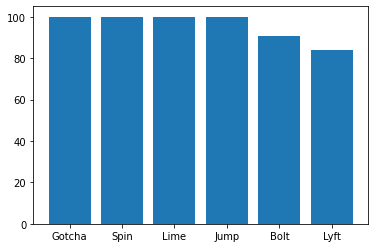

In [37]:
plt.bar(may12hour_sorted['companyname'], may12hour_sorted['chargelevel'])
plt.show()

In [38]:
may24hour = may_stationary.loc[may_stationary['cumulative_sum'] == 1440]
may24hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 397 to 8754198
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sumdid          2375 non-null   object        
 1   pubdatetime     2375 non-null   datetime64[ns]
 2   latitude        2375 non-null   float64       
 3   longitude       2375 non-null   float64       
 4   chargelevel     2375 non-null   float64       
 5   companyname     2375 non-null   int64         
 6   cumulative_sum  2375 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 148.4+ KB


In [39]:
may24hour['sumdid'].value_counts()
#how many sat for a day - 712

PoweredRYBS56AVNJ675                           8
PoweredGJXGSI4SY2PDK                           7
Powered05fee9e1-d132-5e4f-88cd-153058d391fa    7
Powered358712a9-a9c5-50cc-9375-015bae4dc13f    6
Powered5fb8e47f-d8bf-5276-a7ee-07c5cbede466    6
                                              ..
Powered455                                     1
Powered2EBTKWOKLE6MJ                           1
Powered351                                     1
Powered89e193d8-a67d-5eb6-b087-ec7e7bc2d682    1
Powered492                                     1
Name: sumdid, Length: 712, dtype: int64

In [128]:
may24hourgrouped = may24hour.groupby("companyname")
may24hourgrouped = may24hourgrouped.agg({"sumdid": "nunique"})
print(may24hourgrouped)

             sumdid
companyname        
1                 3
2               120
3               114
4                23
5               443
6                 9


In [40]:
may24plus = may_stationary.loc[may_stationary['cumulative_sum'] > 1440]
may24plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746706 entries, 398 to 8754515
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   sumdid          746706 non-null  object        
 1   pubdatetime     746706 non-null  datetime64[ns]
 2   latitude        746706 non-null  float64       
 3   longitude       746706 non-null  float64       
 4   chargelevel     746706 non-null  float64       
 5   companyname     746706 non-null  int64         
 6   cumulative_sum  746706 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 45.6+ MB


In [41]:
may24plus['sumdid'].value_counts()
#how many for more than a day = 

Powered412                                     4899
Powered798                                     4899
Powered685                                     4899
Powered731                                     4899
Powered816                                     4899
                                               ... 
Powered1400320                                    3
Powered47099b12-da4d-5d9d-804c-549433311bbf       3
Powered7c41d147-36a4-57b3-8d19-9fcc45a6ac99       3
Poweredd60df5ce-53ca-5ab2-8f8f-d599520795f8       1
Powereda8ec6f65-8c26-5ebe-91e8-9ffe03b16835       1
Name: sumdid, Length: 710, dtype: int64

In [42]:
may24plus['cumulative_sum'].value_counts()

1445     2373
1450     2371
1455     2369
1460     2044
1465     2042
         ... 
20215      55
20510      55
20375      55
21450      42
21455      42
Name: cumulative_sum, Length: 4003, dtype: int64

In [43]:
may24plus_sorted = may24plus.sort_values(['cumulative_sum','companyname'], ascending = (False, True))
may24plus_sorted.head(30)

,sumdid,pubdatetime,latitude,longitude,chargelevel,companyname,cumulative_sum
722736,Powered253,2019-05-28 16:34:13.203,36.121412,-86.770533,93.0,2,21455
1135120,Powered341,2019-05-28 16:34:13.203,36.144292,-86.811540,90.0,2,21455
1157366,Powered346,2019-05-28 16:34:13.203,36.144000,-86.813622,98.0,2,21455
1295303,Powered372,2019-05-28 16:34:13.203,36.143994,-86.813633,95.0,2,21455
1301407,Powered373,2019-05-28 16:34:13.203,36.160729,-86.777545,56.0,2,21455
1648275,Powered410,2019-05-28 16:34:13.203,36.121243,-86.770368,0.0,2,21455
1657865,Powered412,2019-05-28 16:34:13.203,36.156370,-86.786350,0.0,2,21455
1720696,Powered432,2019-05-28 16:34:13.203,36.121669,-86.770347,74.0,2,21455
1761477,Powered447,2019-05-28 16:34:13.203,36.121480,-86.770450,66.0,2,21455
1775154,Powered450,2019-05-28 16:34:13.203,36.134748,-86.788827,89.0,2,21455


In [44]:
mayweekplus = may_stationary.loc[may_stationary['cumulative_sum'] >= 10080]
mayweekplus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141565 entries, 720461 to 7037870
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   sumdid          141565 non-null  object        
 1   pubdatetime     141565 non-null  datetime64[ns]
 2   latitude        141565 non-null  float64       
 3   longitude       141565 non-null  float64       
 4   chargelevel     141565 non-null  float64       
 5   companyname     141565 non-null  int64         
 6   cumulative_sum  141565 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 8.6+ MB


In [45]:
mayweekplus['sumdid'].value_counts()
#how many for more than a week = 75

Powered609              2276
Powered798              2276
Powered253              2276
Powered341              2276
Powered514              2276
                        ... 
Powered5853593           221
PoweredL3EIUVX3W33OR     195
Powered699                94
Powered7RULSQOA2LM2J      13
Powered4151830             5
Name: sumdid, Length: 75, dtype: int64

In [46]:
mayweekplus['companyname'].value_counts()

2    134732
3      6607
4       226
Name: companyname, dtype: int64

In [47]:
mayweekplus['cumulative_sum'].value_counts()

10085    75
10080    75
10095    75
10090    75
10100    75
         ..
20570    55
20390    55
20495    55
21450    42
21455    42
Name: cumulative_sum, Length: 2276, dtype: int64

In [48]:
mayweekplus_orderly = mayweekplus.loc[mayweekplus['cumulative_sum'].isin([10080, 11520, 12960, 14400, 15840, 17280, 18720, 20160])]
mayweekplus_orderly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 509 entries, 720461 to 7037640
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sumdid          509 non-null    object        
 1   pubdatetime     509 non-null    datetime64[ns]
 2   latitude        509 non-null    float64       
 3   longitude       509 non-null    float64       
 4   chargelevel     509 non-null    float64       
 5   companyname     509 non-null    int64         
 6   cumulative_sum  509 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 31.8+ KB


In [49]:
mayweekplus_orderly['charge_percent'] = mayweekplus_orderly.apply(percentage, axis = 1)

<ipython-input-49-afea44677b86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayweekplus_orderly['charge_percent'] = mayweekplus_orderly.apply(percentage, axis = 1)


In [52]:
#to redefine my hours as days
def days(row): 
    if row ['cumulative_sum'] == 10080:
        return 7
    elif row ['cumulative_sum'] ==11520:
        return 8
    elif row ['cumulative_sum'] ==12960:
        return 9
    elif row ['cumulative_sum'] ==14400:
        return 10
    elif row ['cumulative_sum'] ==15840:
        return 11
    elif row ['cumulative_sum'] ==17280:
        return 12
    elif row ['cumulative_sum'] ==18720:
        return 13
    elif row ['cumulative_sum'] ==20160:
        return 14
    else:
        return 0

In [55]:
mayweekplus_orderly['days'] = mayweekplus_orderly.apply(days, axis = 1)

<ipython-input-55-8c86b7c057ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayweekplus_orderly['days'] = mayweekplus_orderly.apply(days, axis = 1)


In [59]:
mayweekplus_orderly.companyname = mayweekplus_orderly.companyname.replace(company_dict)

C:\Users\Owner\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [60]:
mayweekplus_orderly.head()

,sumdid,pubdatetime,latitude,longitude,chargelevel,companyname,cumulative_sum,charge_percent,days
720461,Powered253,2019-05-20 18:52:08.743,36.121412,-86.770533,93.0,Gotcha,10080,100,7
720749,Powered253,2019-05-21 18:53:05.467,36.121412,-86.770533,93.0,Gotcha,11520,100,8
721037,Powered253,2019-05-22 18:53:59.447,36.121412,-86.770533,93.0,Gotcha,12960,100,9
721325,Powered253,2019-05-23 18:54:54.403,36.121412,-86.770533,93.0,Gotcha,14400,100,10
721613,Powered253,2019-05-24 18:55:46.390,36.121412,-86.770533,93.0,Gotcha,15840,100,11


In [57]:
mayweekplus_orderly['companyname'].value_counts()

2    479
3     28
4      2
Name: companyname, dtype: int64

In [131]:
mayweekplus_orderly2 = mayweekplus_orderly.groupby("companyname")
mayweekplus_orderly2 = mayweekplus_orderly2.agg({"sumdid": "nunique"})
print(mayweekplus_orderly2)

             sumdid
companyname        
Gotcha           65
Lime              8
Spin              2


what i want to try and make is a stacked bar chart - days on x, charge percent on y, by company
or maybe days by company...

In [125]:
mayweekplot1 = mayweekplus_orderly.groupby(['charge_percent', 'companyname'])['sumdid'].count().unstack().fillna(0)
mayweekplot1

companyname,Gotcha,Lime,Spin
charge_percent,,,
10,240.0,6.0,1.0
20,8.0,1.0,0.0
30,0.0,10.0,0.0
40,8.0,5.0,1.0
50,5.0,2.0,0.0
60,40.0,0.0,0.0
70,16.0,4.0,0.0
80,40.0,0.0,0.0
90,40.0,0.0,0.0


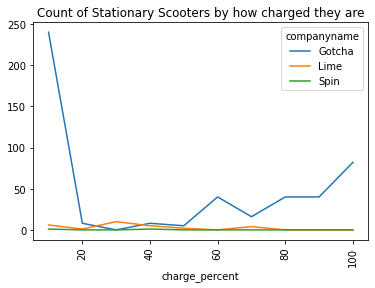

In [127]:
mayweekplot1.plot(kind='line', stacked=False)
plt.title('Count of Stationary Scooters by how charged they are')
plt.xticks(rotation=90, ha='center')
plt.show()

almost - but no
i want to see how many scooters each company has sitting out - for how many days

In [104]:
mayweekplot2 = mayweekplus_orderly.groupby(['days', 'companyname'])['days'].count().unstack().fillna(0)
mayweekplot2

companyname,Gotcha,Lime,Spin
days,,,
7,65.0,8.0,2.0
8,64.0,6.0,0.0
9,62.0,4.0,0.0
10,60.0,4.0,0.0
11,59.0,3.0,0.0
12,57.0,2.0,0.0
13,57.0,1.0,0.0
14,55.0,0.0,0.0


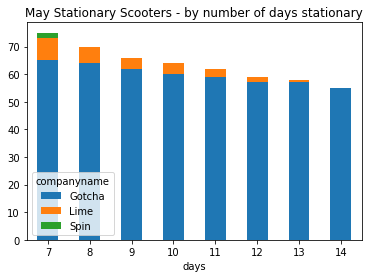

In [115]:
mayweekplot2.plot(kind='bar', stacked=True)
plt.title('May Stationary Scooters - by number of days stationary')
plt.xticks(rotation=0, ha='center')
plt.show()

I'm starting to get the feeling that i'm going to have to manually create a df and then graph it to get what i'm wanting.
so - data:

May - total number of scooters per company:  8303 total
0:Bird: 3064
1:Lyft: 1376
2:Gotcha: 223
3:Lime: 1631
4:Spin: 687
5:Jump: 976
6:Bolt: 346

Total number of scooters sitting 24 hours: 712 : 8.6% of total
number    %of total/sitting:  % of total/company
0: 0       0%              :   0%
1: 3        .4%            :   .2%
2: 120    17%              :  54%
3: 114    16%              :   7%
4: 23      3%              :   3%
5: 443    62%              :  45%
6: 9       1%              :   3%

Total number of scooters sitting 1+ week: 75
0: 0
1: 0
2: 65  87% of total/  29% of company
3: 8   11%
4: 2    3%
5: 0
6: 0

In [187]:
May_scooter_viz = pd.DataFrame({
    "Company" : ["Bird", "Lyft","Gotcha", "Lime","Spin","Jump","Bolt"],
    "Total_Number_of_Scooters" : [3064, 1376, 223, 1631, 687, 976, 346],
    "Number_of_24hour_Stationary_Scooters" : [0, 3, 120, 114, 23, 443, 9],
    "Number_of 1week_Stationary_Scooters" : [0,0,65,8,2,0,0]
})


May_scooter_viz2 = pd.DataFrame({
    "company":["Gotcha", "Lime", "Spin"],
    "total_number":[223,1631,687],
    "week_number":[65,8,2]
})

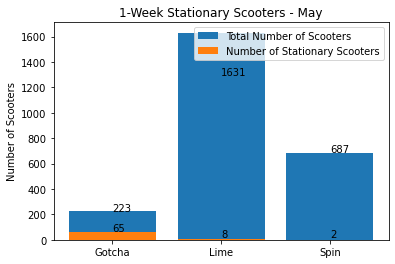

In [214]:
plt.bar(May_scooter_viz2.company, May_scooter_viz2.total_number,label="Total Number of Scooters")
plt.bar(May_scooter_viz2.company, May_scooter_viz2.week_number, label="Number of Stationary Scooters")
plt.legend()
plt.ylabel("Number of Scooters")
plt.title("1-Week Stationary Scooters - May")
plt.text('Gotcha',223,'223')
plt.text('Gotcha',65,'65')
plt.text('Lime',1300,'1631')
plt.text('Lime',20,'8')
plt.text('Spin',687,'687')
plt.text('Spin',20,'2')
plt.savefig('1-Week Stationary Scooters - May.png')
plt.show()

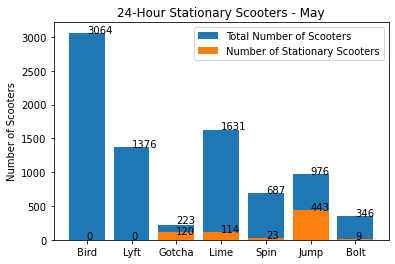

In [215]:
plt.bar(May_scooter_viz.Company, May_scooter_viz.Total_Number_of_Scooters, label = 'Total Number of Scooters')
plt.bar(May_scooter_viz.Company, May_scooter_viz.Number_of_24hour_Stationary_Scooters, label = 'Number of Stationary Scooters')
plt.legend()
plt.ylabel("Number of Scooters")
plt.title("24-Hour Stationary Scooters - May")
plt.text('Bird',3064,'3064')
plt.text('Bird',15,'0')
plt.text('Lyft',1376,'1376')
plt.text('Lyft',15,'0')
plt.text('Gotcha',250,'223')
plt.text('Gotcha',90,'120')
plt.text('Lime',1631,'1631')
plt.text('Lime',114,'114')
plt.text('Spin', 687,'687')
plt.text('Spin',23,'23')
plt.text('Jump',976,'976')
plt.text('Jump',443,'443')
plt.text('Bolt',346,'346')
plt.text('Bolt',15,'9')
plt.savefig('24-Hour Stationary Scooters - May.png')
plt.show()

So - i want a stacked bar chart.  scooter company on x.  number of scooters on y.  comparing total inventory number for the month with the number of scooters sitting 24 hours.

i want another chart.  maybe also stacked bar?  of the same, but just those companies with scooters sitting for a week.

In [ ]:
'''maycompany_df = {"Bird", "Lyft","Gotcha", "Lime","Spin","Jump","Bolt"}
maymonthnumber_df = {3064, 1376, 223, 1631, 687, 976, 346}
may24number_df = {0, 3, 120, 114, 23, 443, 9}
mayweeknumber_df = {0,0,65,8,2,0,0}'''

In [132]:
june24hour = june_stationary.loc[june_stationary['cumulative_sum']==1440]
june24hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4016 entries, 5489 to 14396008
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sumdid          4016 non-null   object        
 1   pubdatetime     4016 non-null   datetime64[ns]
 2   latitude        4016 non-null   float64       
 3   longitude       4016 non-null   float64       
 4   chargelevel     4016 non-null   float64       
 5   companyname     4016 non-null   int64         
 6   cumulative_sum  4016 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 251.0+ KB


In [133]:
june24plus= june_stationary.loc[june_stationary['cumulative_sum']>1440]
june24plus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344171 entries, 5490 to 14396581
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   sumdid          object        
 1   pubdatetime     datetime64[ns]
 2   latitude        float64       
 3   longitude       float64       
 4   chargelevel     float64       
 5   companyname     int64         
 6   cumulative_sum  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 143.1+ MB


In [134]:
june24hour['sumdid'].value_counts()
#how many sat for a day - 1324

PoweredCC5ASB6WSFTHD                            7
Powered05fee9e1-d132-5e4f-88cd-153058d391fa     7
PoweredBZYD3PR7EEMXK                            7
Powered725be631-64e2-5cbf-941c-9b3d27031b53     7
Powered9538aaf0-1e03-5ceb-8856-c4bbc3d6cd0c     7
                                               ..
Powered1929                                     1
Powered-8a086751-8528-1a41-482c-c0b43c247859    1
Powered956b460b-23ac-5ae6-b0d9-5ba0ce0133f9     1
Powered9876847                                  1
Powered346                                      1
Name: sumdid, Length: 1324, dtype: int64

In [135]:
june24hourgrouped = june24hour.groupby("companyname")
june24hourgrouped = june24hourgrouped.agg({"sumdid": "nunique"})
print(june24hourgrouped)

             sumdid
companyname        
2               163
3               140
4                54
5               947
6                20


In [136]:
juneweekplus = june_stationary.loc[june_stationary['cumulative_sum'].isin([10080, 11520, 12960, 14400, 15840, 17280, 18720, 20160])]
juneweekplus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 874259 to 11019612
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sumdid          890 non-null    object        
 1   pubdatetime     890 non-null    datetime64[ns]
 2   latitude        890 non-null    float64       
 3   longitude       890 non-null    float64       
 4   chargelevel     890 non-null    float64       
 5   companyname     890 non-null    int64         
 6   cumulative_sum  890 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 55.6+ KB


In [137]:
juneweekplus['sumdid'].value_counts()
#how many sat for a week or more - 129

PoweredBV42LPYJGVBL4    11
Powered333              11
Powered819              11
Powered470               9
Powered341               8
                        ..
Powered351               1
Powered7RULSQOA2LM2J     1
Powered2340              1
Powered5309061           1
PoweredT5AMEDSVPIOFQ     1
Name: sumdid, Length: 129, dtype: int64

In [138]:
juneweekplusgrouped = juneweekplus.groupby("companyname")
juneweekplusgrouped = juneweekplusgrouped.agg({"sumdid": "nunique"})
print(juneweekplusgrouped)

             sumdid
companyname        
2               114
3                10
4                 5


June - total number of scooters per company:  7822 total
0:Bird: 2910
1:Lyft: 1152
2:Gotcha: 223
3:Lime: 1455
4:Spin: 713
5:Jump: 1036
6:Bolt: 333

Total number of scooters sitting 24 hours: 1324
number    %of total/sitting :  % of total/company
0: 0             0          :  0
1: 0             0          :  0
2: 163           12         :  73
3: 140           11         :  10
4: 54            4          :  8
5: 947           71         :  91
6: 20            2          :  6

Total number of scooters sitting 1+ week: 129
0: 0
1: 0
2: 114   88% of total/ 51% of company
3: 10     8
4: 5      4
5: 0
6: 0

In [204]:
June_scooter_viz = pd.DataFrame({
    "Company" : ["Bird", "Lyft","Gotcha", "Lime","Spin","Jump","Bolt"],
    "Total_Number_of_Scooters" : [2910, 1152, 223, 1455, 713, 1036, 333],
    "Number_of_24hour_Stationary_Scooters" : [0, 0, 163, 140, 54, 947, 20],
    "Number_of 1week_Stationary_Scooters" : [0,0,114,10,5,0,0]
})


June_scooter_viz2 = pd.DataFrame({
    "company":["Gotcha", "Lime","Spin"],
    "total_number":[223,1455,713],
    "week_number":[114,10,5]
})

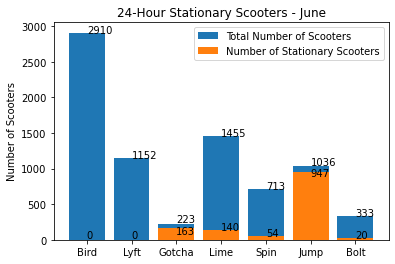

In [216]:
plt.bar(June_scooter_viz.Company, June_scooter_viz.Total_Number_of_Scooters, label = 'Total Number of Scooters')
plt.bar(June_scooter_viz.Company, June_scooter_viz.Number_of_24hour_Stationary_Scooters, label = 'Number of Stationary Scooters')
plt.legend()
plt.ylabel("Number of Scooters")
plt.title("24-Hour Stationary Scooters - June")
plt.text('Bird',2910,'2910')
plt.text('Bird',20,'0')
plt.text('Lyft',1152,'1152')
plt.text('Lyft',20,'0')
plt.text('Gotcha',250,'223')
plt.text('Gotcha',80,'163')
plt.text('Lime',1455,'1455')
plt.text('Lime',140,'140')
plt.text('Spin', 713,'713')
plt.text('Spin',54,'54')
plt.text('Jump',1050,'1036')
plt.text('Jump',900,'947')
plt.text('Bolt',333,'333')
plt.text('Bolt',20,'20')
plt.savefig('24-Hour Stationary Scooters - June.png')
plt.show()

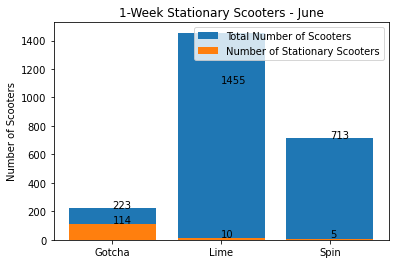

In [217]:
plt.bar(June_scooter_viz2.company, June_scooter_viz2.total_number,label="Total Number of Scooters")
plt.bar(June_scooter_viz2.company, June_scooter_viz2.week_number, label="Number of Stationary Scooters")
plt.legend()
plt.ylabel("Number of Scooters")
plt.title("1-Week Stationary Scooters - June")
plt.text('Gotcha',223,'223')
plt.text('Gotcha',114,'114')
plt.text('Lime',1100,'1455')
plt.text('Lime',20,'10')
plt.text('Spin',713,'713')
plt.text('Spin',20,'5')
plt.savefig('1-Week Stationary Scooters - June.png')
plt.show()

In [139]:
july24hour = july_stationary.loc[june_stationary['cumulative_sum']==1440]
july24hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 5489 to 14307503
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sumdid          3983 non-null   object        
 1   pubdatetime     3983 non-null   datetime64[ns]
 2   latitude        3983 non-null   float64       
 3   longitude       3983 non-null   float64       
 4   chargelevel     3983 non-null   float64       
 5   companyname     3983 non-null   int64         
 6   cumulative_sum  3983 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 248.9+ KB


In [140]:
july24hour['sumdid'].value_counts()
#how many sat for a day - 1560

Powered00746183-96c8-58d7-97b5-04a091c91b34    8
Powered05f2f35c-dd27-5517-969a-47bc717eb547    7
Poweredfce3c957-bdef-5153-98b6-539b6baad80e    7
Powered0d7bb73e-dd6f-5ce3-8791-909552333903    6
Powered9b9ffacb-d15f-58c6-8043-672aed4a4cc5    6
                                              ..
Powered3DM4E                                   1
Powered7914843                                 1
Powered7098496                                 1
Poweredd8e5b3cc-6f3e-57d6-abef-3890ee5276f0    1
Powered6e0cd42f-7ad1-5ff0-b617-71c7ffc8a81c    1
Name: sumdid, Length: 1560, dtype: int64

In [141]:
july24hourgrouped = july24hour.groupby("companyname")
july24hourgrouped = july24hourgrouped.agg({"sumdid": "nunique"})
print(july24hourgrouped)

             sumdid
companyname        
0                96
2               158
3                80
4               233
5               983
6                10


In [142]:
julyweekplus = july_stationary.loc[july_stationary['cumulative_sum'].isin([10080, 11520, 12960, 14400, 15840, 17280, 18720, 20160])]
julyweekplus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2752 entries, 44525 to 14313496
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   sumdid          2752 non-null   object        
 1   pubdatetime     2752 non-null   datetime64[ns]
 2   latitude        2752 non-null   float64       
 3   longitude       2752 non-null   float64       
 4   chargelevel     2752 non-null   float64       
 5   companyname     2752 non-null   int64         
 6   cumulative_sum  2752 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 172.0+ KB


In [143]:
julyweekplus['sumdid'].value_counts()
#how many sat for a week or more - 977

Powered481                                     13
Powered632                                     12
PoweredK7VBEW7S2VHPG                           10
Powered4987498                                  9
Powered747                                      8
                                               ..
Powered2726691                                  1
Powered401                                      1
Powered613                                      1
Powered02e513fd-b017-5592-b03f-101e0dd8efa6     1
Powerededc0b6ac-c3bd-5c6e-a1a4-3c7226a14578     1
Name: sumdid, Length: 977, dtype: int64

In [144]:
julyweekplusgrouped = julyweekplus.groupby("companyname")
julyweekplusgrouped = julyweekplusgrouped.agg({"sumdid": "nunique"})
print(julyweekplusgrouped)

             sumdid
companyname        
2               171
3                 7
4                 5
5               794


July - total number of scooters per company:  6787 total
0:Bird: 2583
1:Lyft: 1026
2:Gotcha: 224
3:Lime: 902
4:Spin: 570
5:Jump: 1206
6:Bolt: 276

Total number of scooters sitting 24 hours: 1560
number    %of total/sitting :  % of total/company
0: 96                 6     :  4
1: 0                  0     :  0
2: 158               10     :  71
3: 80                 5     :  9
4: 233               14     :  39
5: 983               63     :  81
6: 10                 1     :  4

Total number of scooters sitting 1+ week: 977
0: 0
1: 0
2: 171     16% of total/  76% of company
3: 7        1
4: 5        1
5: 794     81         /  66
6: 0

In [211]:
July_scooter_viz = pd.DataFrame({
    "Company" : ["Bird", "Lyft","Gotcha", "Lime","Spin","Jump","Bolt"],
    "Total_Number_of_Scooters" : [2583, 1026, 224, 902, 570, 1206, 276],
    "Number_of_24hour_Stationary_Scooters" : [96, 0, 158, 80, 233, 983, 10],
    "Number_of 1week_Stationary_Scooters" : [0,0,171,7,5,794,0]
})


July_scooter_viz2 = pd.DataFrame({
    "company":["Gotcha", "Lime","Spin","Jump"],
    "total_number":[224,902,570,1206],
    "week_number":[171,7,5,794]
})

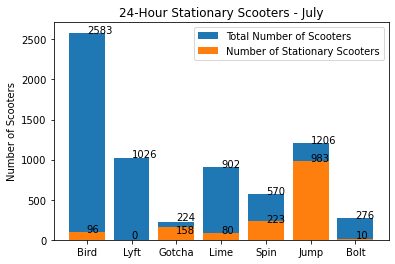

In [218]:
plt.bar(July_scooter_viz.Company, July_scooter_viz.Total_Number_of_Scooters, label = 'Total Number of Scooters')
plt.bar(July_scooter_viz.Company, July_scooter_viz.Number_of_24hour_Stationary_Scooters, label = 'Number of Stationary Scooters')
plt.legend()
plt.ylabel("Number of Scooters")
plt.title("24-Hour Stationary Scooters - July")
plt.text('Bird',2583,'2583')
plt.text('Bird',96,'96')
plt.text('Lyft',1026,'1026')
plt.text('Lyft',20,'0')
plt.text('Gotcha',250,'224')
plt.text('Gotcha',80,'158')
plt.text('Lime',902,'902')
plt.text('Lime',80,'80')
plt.text('Spin', 570,'570')
plt.text('Spin',223,'223')
plt.text('Jump',1206,'1206')
plt.text('Jump',983,'983')
plt.text('Bolt',276,'276')
plt.text('Bolt',20,'10')
plt.savefig('24-Hour Stationary Scooters - July.png')
plt.show()

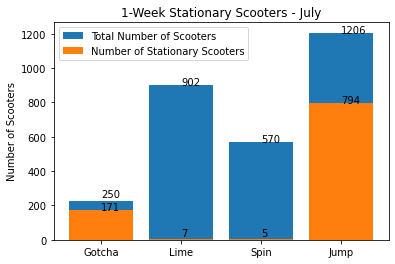

In [219]:
plt.bar(July_scooter_viz2.company, July_scooter_viz2.total_number,label="Total Number of Scooters")
plt.bar(July_scooter_viz2.company, July_scooter_viz2.week_number, label="Number of Stationary Scooters")
plt.legend()
plt.ylabel("Number of Scooters")
plt.title("1-Week Stationary Scooters - July")
plt.text('Gotcha',250,'250')
plt.text('Gotcha',171,'171')
plt.text('Lime',902,'902')
plt.text('Lime',20,'7')
plt.text('Spin',570,'570')
plt.text('Spin',20,'5')
plt.text('Jump',1206,'1206')
plt.text('Jump',794,'794')
plt.savefig('1-Week Stationary Scooters - July.png')
plt.show()

These scooters sitting there for a week ... are they really not being used?  let's search for one in the trips data  ... 

In [146]:
julyweekplus.head()

,sumdid,pubdatetime,latitude,longitude,chargelevel,companyname,cumulative_sum
44525,Powered00746183-96c8-58d7-97b5-04a091c91b34,2019-07-23 09:28:13,36.1202,-86.7533,4.0,5,10080
44813,Powered00746183-96c8-58d7-97b5-04a091c91b34,2019-07-24 09:29:13,36.1202,-86.7533,4.0,5,11520
53425,Powered009445c2-292c-5e04-aa82-b3b390f8e57a,2019-07-23 09:28:13,36.1200,-86.7532,4.0,5,10080
53713,Powered009445c2-292c-5e04-aa82-b3b390f8e57a,2019-07-24 09:29:13,36.1200,-86.7532,4.0,5,11520
62325,Powered00be5e61-ba93-57a4-b0c2-aa8c0d4379f3,2019-07-23 09:28:13,36.1562,-86.6281,60.0,5,10080


In [149]:
julyweekplus_slice = julyweekplus.loc[julyweekplus['cumulative_sum']==10080]
julyweekplus_slice.head()

,sumdid,pubdatetime,latitude,longitude,chargelevel,companyname,cumulative_sum
44525,Powered00746183-96c8-58d7-97b5-04a091c91b34,2019-07-23 09:28:13,36.1202,-86.7533,4.0,5,10080
53425,Powered009445c2-292c-5e04-aa82-b3b390f8e57a,2019-07-23 09:28:13,36.1200,-86.7532,4.0,5,10080
62325,Powered00be5e61-ba93-57a4-b0c2-aa8c0d4379f3,2019-07-23 09:28:13,36.1562,-86.6281,60.0,5,10080
78424,Powered01203fbf-ff8f-534b-bb27-a19999d02288,2019-07-23 09:28:13,36.1198,-86.7529,39.0,5,10080
103964,Powered022a0f15-116c-598f-b479-e80e569f5a5d,2019-07-23 09:28:13,36.1202,-86.7533,0.0,5,10080


In [158]:
julytrip = pd.read_csv('../data/july_trip.csv')
julytrip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000


In [161]:
julytripcheck = julytrip.loc[julytrip["sumdID"]==("Powered00746183-96c8-58d7-97b5-04a091c91b34")]
julytripcheck.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
